## **Import libraries**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Read Data**

In [44]:
df = pd.read_csv('data/results.csv')

In [45]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## **Data Cleaning**

In [46]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [47]:
df[df.duplicated()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


In [48]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [49]:
df['date'] = pd.to_datetime(df['date'])

In [50]:
df.shape

(48673, 9)

## **Feature Engineering**

In [51]:
def get_match_result(row):
    if row['home_score'] > row['away_score']:
        return 'Home Win'
    elif row['home_score'] < row['away_score']:
        return 'Away Win'
    else:
        return "Draw"

df['match_result'] = df.apply(get_match_result,axis=1)

In [52]:
df['goal_difference'] = abs(df['home_score'] - df['away_score'])
df['total_goals'] = df['home_score'] + df['away_score']

In [54]:
df['is_high_scoring'] = df['total_goals'] >= 4
df['is_derby'] = df['home_team'] == df['away_team']

In [56]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_result,goal_difference,total_goals,is_high_scoring,is_derby
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0,0,False,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Home Win,2,6,True,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Home Win,1,3,False,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0,4,True,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Home Win,3,3,False,False


## **Exploratory data analysis**

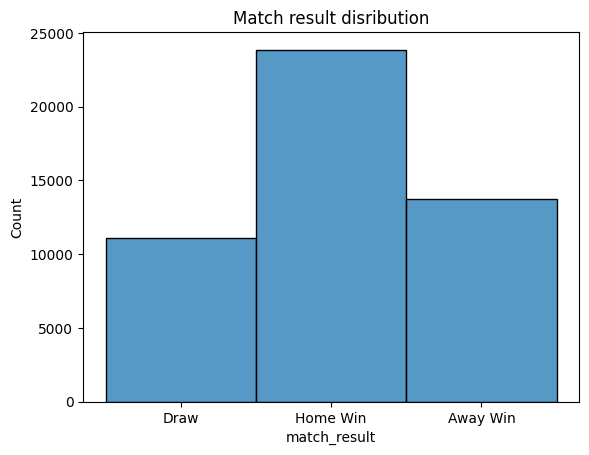

In [61]:
sns.histplot(data=df,x='match_result')
plt.title('Match result disribution')
plt.show()

### Average goals per match globally

[]

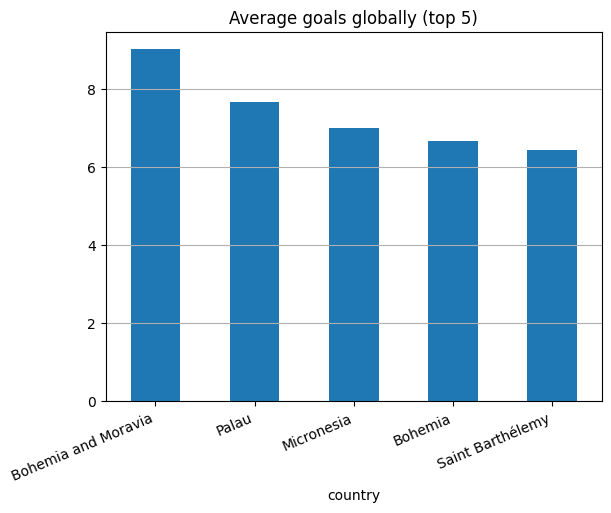

In [83]:
n=5
avg_goals_country = df.groupby('country')['total_goals'].mean().sort_values(ascending=False)
avg_goals_country.head(n).plot(kind='bar',title=f'Average goals globally (top {n})')
plt.xticks(rotation=23, ha='right')
plt.grid(visible=True,axis='y')
plt.plot()

### Top 10 highest scoring matches.

In [93]:
top_10_highest = df.nlargest(10,'total_goals')
top_10_highest

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_result,goal_difference,total_goals,is_high_scoring,is_derby
25418,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,Home Win,31,31,True,False
8548,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,Tahiti,False,Home Win,30,30,True,False
11912,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False,Home Win,24,24,True,False
25415,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,Home Win,22,22,True,False
30511,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True,Home Win,20,22,True,False
6576,1966-04-03,Libya,Oman,21,0,Arab Cup,Baghdad,Iraq,True,Home Win,21,21,True,False
21951,1997-05-13,Kazakhstan,Guam,20,1,East Asian Games,Busan,South Korea,True,Home Win,19,21,True,False
29038,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True,Away Win,21,21,True,False
15917,1987-12-15,American Samoa,Papua New Guinea,0,20,South Pacific Games,Nouméa,New Caledonia,True,Away Win,20,20,True,False
24175,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False,Home Win,20,20,True,False


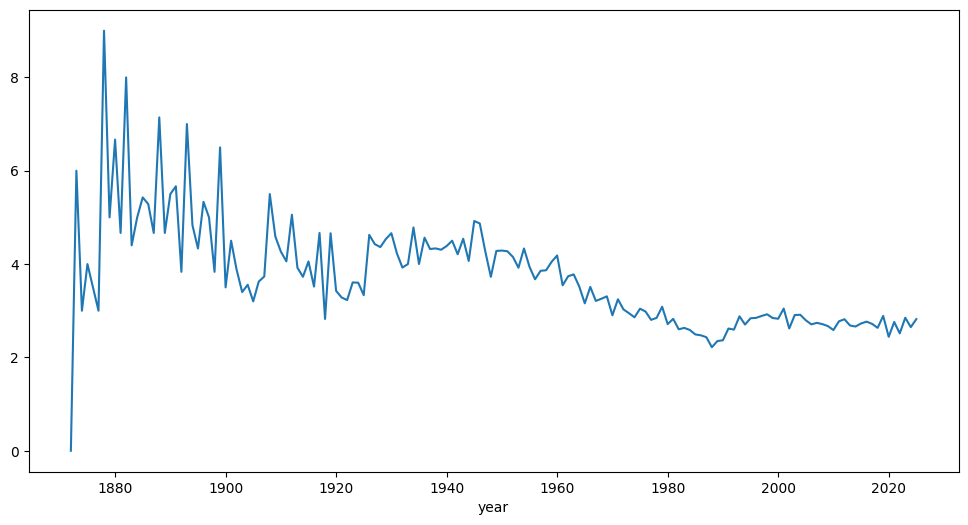

In [98]:
df['year'] = df['date'].dt.year
plt.figure(figsize=(12, 6))
df.groupby('year')['total_goals'].mean()\
    .plot(kind='line')
plt.show()

### Top 10 teams with most wins

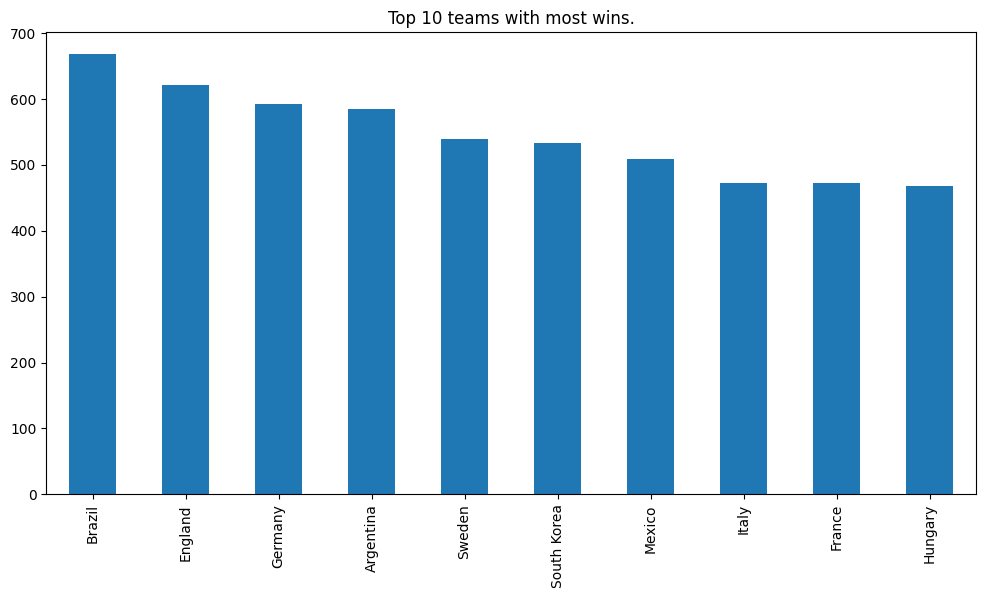

In [114]:
home_wins = df[df['home_score'] > df['away_score']]['home_team'].value_counts()
away_wins = df[df['home_score'] < df['away_score']]['away_team'].value_counts()

n=10
plt.figure(figsize=(12,6))
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)
total_wins.head(n).plot(kind='bar')
plt.title(f'Top {n} teams with most wins.')
plt.show()

### Top teams with the highest average goals scored.

In [122]:
home_goals = df.groupby('home_team')['home_score'].agg(['sum','count'])
home_goals.columns = ['goals','matches']

away_goals = df.groupby('away_team')['away_score'].agg(['sum','count'])
away_goals.columns = ['goals','matches']

all_team_goals = home_goals.add(away_goals, fill_value=0)
all_team_goals['avg_goals'] = all_team_goals['goals'] / all_team_goals['matches']

n = 10
all_team_goals.sort_values(by='avg_goals',ascending=False).head(n)

,goals,matches,avg_goals
Elba Island,5.0,1.0,5.000000
Yorkshire,27.0,7.0,3.857143
Parishes of Jersey,11.0,3.0,3.666667
Cascadia,23.0,7.0,3.285714
Isle of Man,186.0,58.0,3.206897
Occitania,103.0,33.0,3.121212
Sápmi,90.0,29.0,3.103448
Surrey,3.0,1.0,3.000000
Silesia,24.0,8.0,3.000000
Asturias,3.0,1.0,3.000000
